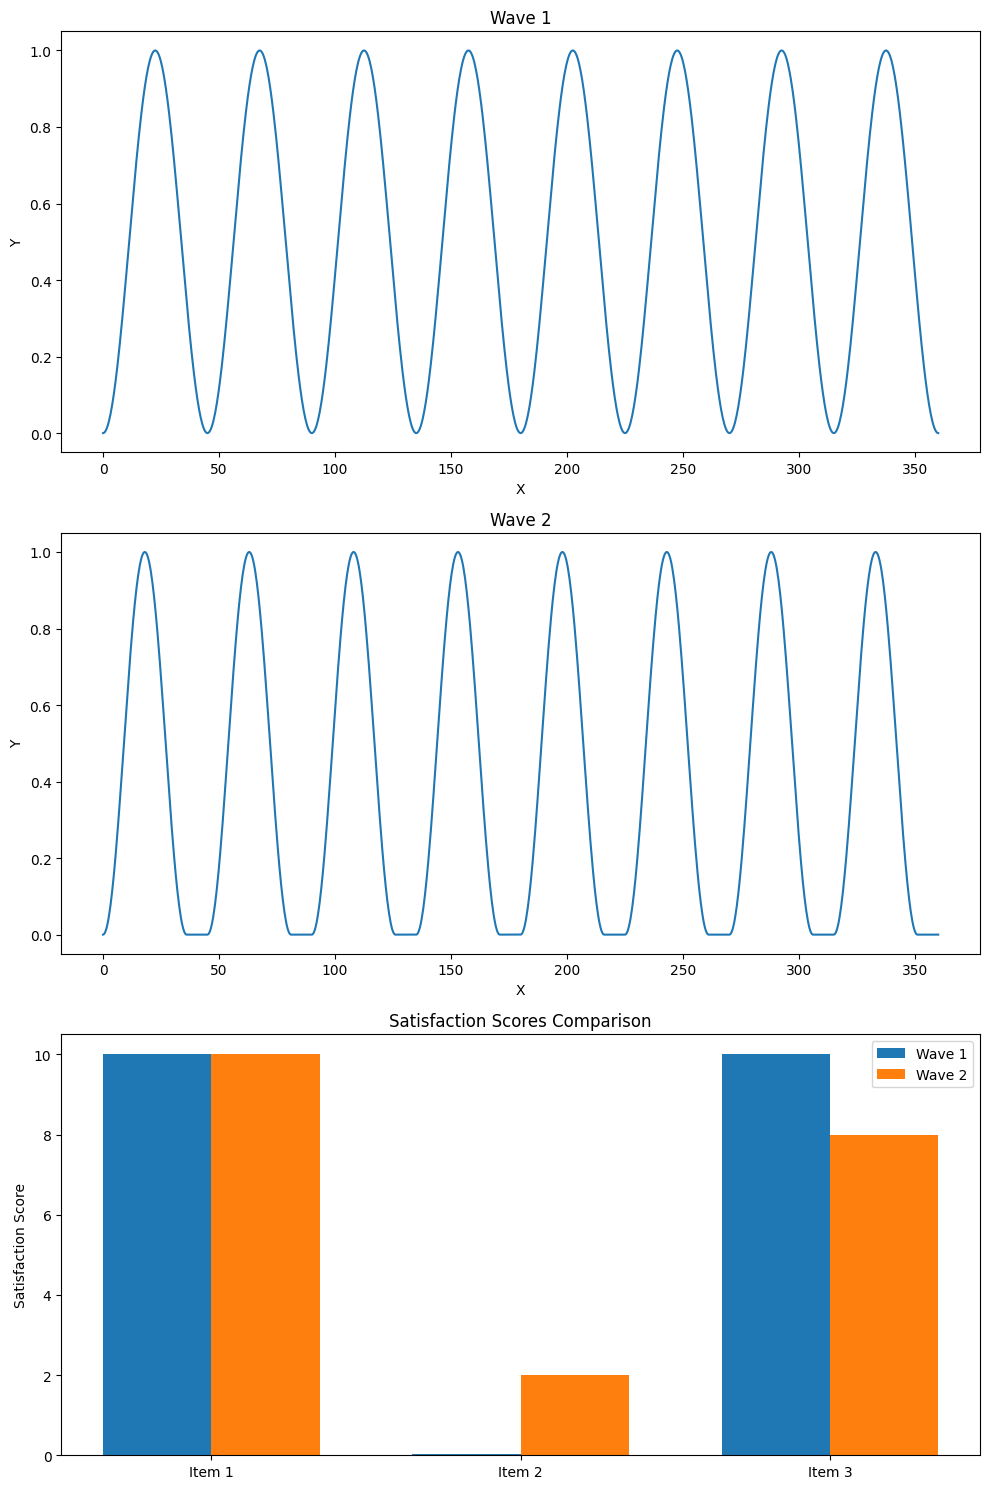

Wave 1 Satisfaction Scores: [ 9.99997528  0.02       10.        ]
Wave 2 Satisfaction Scores: [9.99997528 2.01       8.        ]


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 읽기
df = pd.read_csv('simple_sample.csv', header=None)

# 첫 번째와 두 번째 파형 데이터 추출
wave1_scores = df.iloc[0:3, 0].values
wave1_x = df.iloc[0:, 1].values
wave1_y = df.iloc[0:, 2].values

wave2_scores = df.iloc[0:3, 3].values
wave2_x = df.iloc[0:, 4].values
wave2_y = df.iloc[0:, 5].values

# 그래프 그리기
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 15))

# 첫 번째 파형 그래프
ax1.plot(wave1_x, wave1_y)
ax1.set_title('Wave 1')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')

# 두 번째 파형 그래프
ax2.plot(wave2_x, wave2_y)
ax2.set_title('Wave 2')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')

# 만족감 점수 막대 그래프
categories = ['Item 1', 'Item 2', 'Item 3']
x = range(len(categories))
width = 0.35

ax3.bar([i - width/2 for i in x], wave1_scores, width, label='Wave 1')
ax3.bar([i + width/2 for i in x], wave2_scores, width, label='Wave 2')
ax3.set_ylabel('Satisfaction Score')
ax3.set_title('Satisfaction Scores Comparison')
ax3.set_xticks(x)
ax3.set_xticklabels(categories)
ax3.legend()

plt.tight_layout()
plt.show()

print("Wave 1 Satisfaction Scores:", wave1_scores)
print("Wave 2 Satisfaction Scores:", wave2_scores)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


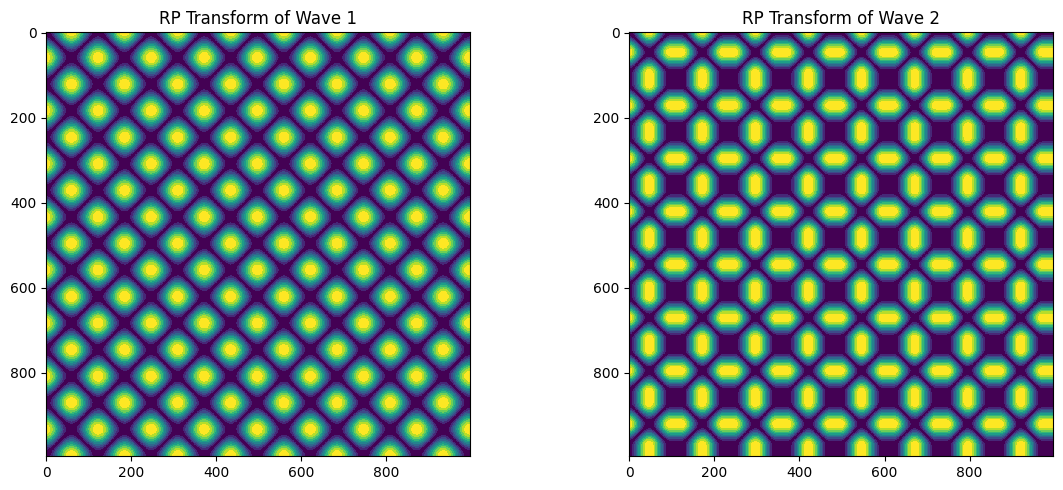


Fourier coefficients for Wave 1:
a0 (DC component): 0.005685471000000001
an (Cosine coefficients, first 5): [ 3.31724612e-21 -5.98514646e-20  4.22454840e-21 -9.21994079e-20
  2.53545084e-20]
bn (Sine coefficients, first 5): [ 1.89665215e-19  1.23661410e-19 -1.18243901e-19 -7.17253793e-20
 -2.32748919e-19]

All coefficients for Wave 1 (first 10):
[ 5.68547100e-03  3.31724612e-21 -5.98514646e-20  4.22454840e-21
 -9.21994079e-20  2.53545084e-20  2.32616569e-19  1.49554010e-19
 -1.31697845e-19  5.26420514e-20]

Fourier coefficients for Wave 2:
a0 (DC component): 0.008874061
an (Cosine coefficients, first 5): [-6.25297666e-20 -2.59728013e-19  1.28611034e-19 -2.89507674e-19
  1.50697639e-19]
bn (Sine coefficients, first 5): [ 2.41656285e-19  1.74214483e-19 -2.69197513e-19 -2.01019208e-19
 -3.17103622e-19]

All coefficients for Wave 2 (first 10):
[ 8.87406100e-03 -6.25297666e-20 -2.59728013e-19  1.28611034e-19
 -2.89507674e-19  1.50697639e-19  2.86033278e-19  1.96388279e-19
 -3.96914075e-19 

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft
import pandas as pd
from scipy.spatial.distance import pdist, squareform

# CSV 파일 읽기
df = pd.read_csv('simple_sample.csv', header=None)

# 첫 번째와 두 번째 파형 데이터 추출
wave1_x = df.iloc[3:, 1].values
wave1_y = df.iloc[3:, 2].values
wave2_x = df.iloc[3:, 4].values
wave2_y = df.iloc[3:, 5].values

# RP 변환 함수 (0과 1의 이진값으로 나옴.)
'''
def recurrence_plot(s, eps=0.10, steps=None):
    if steps is None:
        steps = len(s)
    d = np.zeros((steps, steps))
    for i in range(steps):
        for j in range(steps):
            d[i, j] = np.abs(s[i] - s[j])
    return (d < eps).astype(int)
'''
# Spearlab버전 RP변환함수(0~1사이의 값으로 나옴)
def recurrence_plot(s, eps=0.10, steps=10):
    s = s.reshape(-1, 1)  # 2D array로 변환
    d = pdist(s)
    d = np.floor(d/eps)
    d[d>steps] = steps
    Z = squareform(d)
    return Z / steps  # 0과 1 사이의 값으로 정규화


# 수정된 푸리에 변환 함수
def fourier_transform(x, y):
    n = len(x)
    t = np.linspace(0, 1, n)
    interpolated_y = np.interp(t, x, y)
    fft_result = fft(interpolated_y)
    
    a0 = np.real(fft_result[0]) / n  # DC component
    an = 2 * np.real(fft_result[1:n//2]) / n  # Cosine coefficients
    bn = -2 * np.imag(fft_result[1:n//2]) / n  # Sine coefficients
    
    return a0, an, bn

# RP 변환 및 시각화 (이전과 동일)
plt.figure(figsize=(12, 5))

plt.subplot(121)
rp1 = recurrence_plot(wave1_y)
print(rp1)
plt.imshow(rp1, cmap='viridis', interpolation='nearest')
plt.title('RP Transform of Wave 1')

plt.subplot(122)
rp2 = recurrence_plot(wave2_y)
plt.imshow(rp2, cmap='viridis', interpolation='nearest')
plt.title('RP Transform of Wave 2')

plt.tight_layout()
plt.show()

# 푸리에 변환 및 결과 출력
for i, (x, y) in enumerate([(wave1_x, wave1_y), (wave2_x, wave2_y)], 1):
    a0, an, bn = fourier_transform(x, y)
    print(f"\nFourier coefficients for Wave {i}:")
    print(f"a0 (DC component): {a0}")
    print(f"an (Cosine coefficients, first 5): {an[:5]}")
    print(f"bn (Sine coefficients, first 5): {bn[:5]}")

    # 전체 계수 리스트 (a0, an, bn 순서)
    all_coeffs = np.concatenate(([a0], an, bn))
    print(f"\nAll coefficients for Wave {i} (first 10):")
    print(all_coeffs[:10])

In [6]:
'''
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
import pandas as pd
from scipy.fft import fft
from sklearn.preprocessing import MinMaxScaler
import visdom

# Visdom 설정
vis = visdom.Visdom()

# CUDA 사용 가능 여부 확인
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# 데이터 로딩 및 전처리
def load_and_preprocess_data(file_path):
    df = pd.read_csv(file_path, header=None)
    num_waves = df.shape[1] // 3
    waves = []
    scores = []
    
    for i in range(num_waves):
        x = df.iloc[3:, i*3 + 1].values
        y = df.iloc[3:, i*3 + 2].values
        score = df.iloc[0:3, i*3].values
        
        waves.append((x, y))
        scores.append(score)
    
    return waves, np.array(scores)

# 푸리에 변환 함수
def fourier_transform(x, y):
    n = len(x)
    t = np.linspace(0, 1, n)
    interpolated_y = np.interp(t, x, y)
    fft_result = fft(interpolated_y)
    
    a0 = np.real(fft_result[0]) / n
    an = 2 * np.real(fft_result[1:n//2]) / n
    bn = -2 * np.imag(fft_result[1:n//2]) / n
    
    return np.concatenate(([a0], an, bn))

# RP 변환 함수
def recurrence_plot(s, eps=0.10, steps=None):
    if steps is None:
        steps = len(s)
    d = np.abs(s[:, None] - s[None, :])
    return (d < eps).astype(float)

# 데이터셋 클래스
class WaveformDataset(Dataset):
    def __init__(self, waves, scores):
        self.waves = waves
        self.scores = scores
        
    def __len__(self):
        return len(self.waves)
    
    def __getitem__(self, idx):
        x, y = self.waves[idx]
        fourier_coeffs = fourier_transform(x, y)
        rp_image = recurrence_plot(y)
        score = self.scores[idx]
        
        return (
            torch.FloatTensor(fourier_coeffs),
            torch.FloatTensor(rp_image).unsqueeze(0),
            torch.FloatTensor(score)
        )

# RNN 모델
class RNNModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNNModel, self).__init__()
        self.rnn = nn.GRU(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        _, hidden = self.rnn(x.unsqueeze(1))
        output = self.fc(hidden.squeeze(0))
        return output

# CNN 모델
class CNNModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        
        # 동적으로 fully connected 층의 입력 크기 계산
        with torch.no_grad():
            x = torch.zeros(1, 1, input_size, input_size)
            x = self.pool(torch.relu(self.conv1(x)))
            x = self.pool(torch.relu(self.conv2(x)))
            self.fc_input_size = x.numel()
        
        self.fc1 = nn.Linear(self.fc_input_size, 128)
        self.fc2 = nn.Linear(128, output_size)
        
    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, self.fc_input_size)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# 멀티모달 모델
class MultimodalModel(nn.Module):
    def __init__(self, rnn_input_size, rnn_hidden_size, cnn_input_size, output_size):
        super(MultimodalModel, self).__init__()
        self.rnn = RNNModel(rnn_input_size, rnn_hidden_size, output_size)
        self.cnn = CNNModel(cnn_input_size, output_size)
        
    def forward(self, rnn_input, cnn_input):
        rnn_output = self.rnn(rnn_input)
        cnn_output = self.cnn(cnn_input)
        return (rnn_output + cnn_output) / 2

# 학습 함수
def train_model(model, train_loader, criterion, optimizer, num_epochs):
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        
        for fourier_coeffs, rp_images, scores in train_loader:
            fourier_coeffs = fourier_coeffs.to(device)
            rp_images = rp_images.to(device)
            scores = scores.to(device)
            
            optimizer.zero_grad()
            
            outputs = model(fourier_coeffs, rp_images)
            loss = criterion(outputs, scores)
            
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
        
        epoch_loss = running_loss / len(train_loader)
        vis.line(X=torch.tensor([epoch]), Y=torch.tensor([epoch_loss]), win='loss_plot', update='append' if epoch > 0 else None, opts=dict(title='Training Loss'))
        
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}')

# 예측 함수
def predict(model, data_loader):
    model.eval()
    predictions = []
    actual_scores = []
    
    with torch.no_grad():
        for fourier_coeffs, rp_images, scores in data_loader:
            fourier_coeffs = fourier_coeffs.to(device)
            rp_images = rp_images.to(device)
            
            outputs = model(fourier_coeffs, rp_images)
            predictions.append(outputs.cpu().numpy())
            actual_scores.append(scores.numpy())
    
    return np.concatenate(predictions), np.concatenate(actual_scores)

# 메인 실행 부분
if __name__ == "__main__":
    # 데이터 로드 및 전처리
    waves, scores = load_and_preprocess_data('sample_csv.csv')
    
    # 데이터셋 및 데이터 로더 생성
    dataset = WaveformDataset(waves, scores)
    train_loader = DataLoader(dataset, batch_size=32, shuffle=True)
    
    # 모델 파라미터 설정
    sample_fourier, sample_rp, _ = dataset[0]
    rnn_input_size = sample_fourier.size(0)
    cnn_input_size = sample_rp.size(1)
    rnn_hidden_size = 64
    output_size = 3
    
    # 모델, 손실 함수, 옵티마이저 초기화
    model = MultimodalModel(rnn_input_size, rnn_hidden_size, cnn_input_size, output_size).to(device)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters())
    
    # 학습 실행
    num_epochs = 100
    train_model(model, train_loader, criterion, optimizer, num_epochs)
    
    print("Training completed.")
    
    # 예측 수행
    test_loader = DataLoader(dataset, batch_size=1, shuffle=False)
    predictions, actual_scores = predict(model, test_loader)
    
    # 결과 출력
    for i in range(len(predictions)):
        print(f"Waveform {i+1}:")
        print(f"Predicted scores: {predictions[i]}")
        print(f"Actual scores: {actual_scores[i]}")
        print()
    
    # 전체 MSE 계산
    mse = np.mean((predictions - actual_scores) ** 2)
    print(f"Overall MSE: {mse}")
'''

#train/ val 나누기 전 코드.

'\nimport torch\nimport torch.nn as nn\nimport torch.optim as optim\nfrom torch.utils.data import Dataset, DataLoader\nimport numpy as np\nimport pandas as pd\nfrom scipy.fft import fft\nfrom sklearn.preprocessing import MinMaxScaler\nimport visdom\n\n# Visdom 설정\nvis = visdom.Visdom()\n\n# CUDA 사용 가능 여부 확인\ndevice = torch.device("cuda" if torch.cuda.is_available() else "cpu")\nprint(f"Using device: {device}")\n\n# 데이터 로딩 및 전처리\ndef load_and_preprocess_data(file_path):\n    df = pd.read_csv(file_path, header=None)\n    num_waves = df.shape[1] // 3\n    waves = []\n    scores = []\n    \n    for i in range(num_waves):\n        x = df.iloc[3:, i*3 + 1].values\n        y = df.iloc[3:, i*3 + 2].values\n        score = df.iloc[0:3, i*3].values\n        \n        waves.append((x, y))\n        scores.append(score)\n    \n    return waves, np.array(scores)\n\n# 푸리에 변환 함수\ndef fourier_transform(x, y):\n    n = len(x)\n    t = np.linspace(0, 1, n)\n    interpolated_y = np.interp(t, x, y)\n    ff

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split
import numpy as np
import pandas as pd
from scipy.fft import fft
from sklearn.preprocessing import MinMaxScaler
import visdom
from scipy.spatial.distance import pdist, squareform

# Visdom 설정
vis = visdom.Visdom()

# CUDA 사용 가능 여부 확인
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# 데이터 로딩 및 전처리
def load_and_preprocess_data(file_path):
    df = pd.read_csv(file_path, header=None)
    num_waves = df.shape[1] // 3
    waves = []
    scores = []
    
    for i in range(num_waves):
        x = df.iloc[0:, i*3 + 1].values
        y = df.iloc[0:, i*3 + 2].values
        score = df.iloc[0:3, i*3].values
        
        waves.append((x, y))
        scores.append(score)
    
    return waves, np.array(scores)

# 푸리에 변환 함수
def fourier_transform(x, y):
    n = len(x)
    t = np.linspace(0, 1, n)
    interpolated_y = np.interp(t, x, y)
    fft_result = fft(interpolated_y)
    
    a0 = np.real(fft_result[0]) / n
    an = 2 * np.real(fft_result[1:n//2]) / n
    bn = -2 * np.imag(fft_result[1:n//2]) / n
    
    return np.concatenate(([a0], an, bn))

# RP 변환 함수(이진 배열로나옴)
'''
def recurrence_plot(s, eps=0.10, steps=None):
    if steps is None:
        steps = len(s)
    d = np.abs(s[:, None] - s[None, :])
    return (d < eps).astype(float)
'''
#수정된 RP변환 함수
def recurrence_plot(s, eps=0.10, steps=10):
    s = s.reshape(-1, 1)  # 2D array로 변환
    d = pdist(s)
    d = np.floor(d/eps)
    d[d>steps] = steps
    Z = squareform(d)
    return Z / steps  # 0과 1 사이의 값으로 정규화

# 데이터셋 클래스
class WaveformDataset(Dataset):
    def __init__(self, waves, scores):
        self.waves = waves
        self.scores = scores
        
    def __len__(self):
        return len(self.waves)
    
    def __getitem__(self, idx):
        x, y = self.waves[idx]
        fourier_coeffs = fourier_transform(x, y)
        rp_image = recurrence_plot(y)
        score = self.scores[idx]
        
        return (
            torch.FloatTensor(fourier_coeffs),
            torch.FloatTensor(rp_image).unsqueeze(0),
            torch.FloatTensor(score)
        )

# RNN 모델
class RNNModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNNModel, self).__init__()
        self.rnn = nn.GRU(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        _, hidden = self.rnn(x.unsqueeze(1))
        output = self.fc(hidden.squeeze(0))
        return output

# CNN 모델
class CNNModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        
        # 동적으로 fully connected 층의 입력 크기 계산
        with torch.no_grad():
            x = torch.zeros(1, 1, input_size, input_size)
            x = self.pool(torch.relu(self.conv1(x)))
            x = self.pool(torch.relu(self.conv2(x)))
            self.fc_input_size = x.numel()
        
        self.fc1 = nn.Linear(self.fc_input_size, 128)
        self.fc2 = nn.Linear(128, output_size)
        
    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, self.fc_input_size)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# 멀티모달 모델
class MultimodalModel(nn.Module):
    def __init__(self, rnn_input_size, rnn_hidden_size, cnn_input_size, output_size):
        super(MultimodalModel, self).__init__()
        self.rnn = RNNModel(rnn_input_size, rnn_hidden_size, output_size)
        self.cnn = CNNModel(cnn_input_size, output_size)
        
    def forward(self, rnn_input, cnn_input):
        rnn_output = self.rnn(rnn_input)
        cnn_output = self.cnn(cnn_input)
        return (rnn_output + cnn_output) / 2

# 학습 함수
def train_model(model, train_loader, test_loader, criterion, optimizer, num_epochs):
    best_mse = float('inf')
    
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        
        for fourier_coeffs, rp_images, scores in train_loader:
            fourier_coeffs = fourier_coeffs.to(device)
            rp_images = rp_images.to(device)
            scores = scores.to(device)
            
            optimizer.zero_grad()
            
            outputs = model(fourier_coeffs, rp_images)
            loss = criterion(outputs, scores)
            
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
        
        epoch_loss = running_loss / len(train_loader)
        vis.line(X=torch.tensor([epoch]), Y=torch.tensor([epoch_loss]), win='loss_plot', update='append' if epoch > 0 else None, opts=dict(title='Training Loss'))
        
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}')
        
        # Test 데이터에서 성능 평가
        model.eval()
        predictions, actual_scores = predict(model, test_loader)
        mse = np.mean((predictions - actual_scores) ** 2)
        print(f'Test MSE after Epoch {epoch+1}: {mse:.4f}')
        
        # Best 모델 저장
        if mse < best_mse:
            best_mse = mse
            torch.save(model.state_dict(), 'best_model.pth')
            print('Saved new best model with MSE:', mse)

# 예측 함수
def predict(model, data_loader):
    model.eval()
    predictions = []
    actual_scores = []
    
    with torch.no_grad():
        for fourier_coeffs, rp_images, scores in data_loader:
            fourier_coeffs = fourier_coeffs.to(device)
            rp_images = rp_images.to(device)
            
            outputs = model(fourier_coeffs, rp_images)
            predictions.append(outputs.cpu().numpy())
            actual_scores.append(scores.numpy())
    
    return np.concatenate(predictions), np.concatenate(actual_scores)

# 메인 실행 부분
if __name__ == "__main__":
    # 데이터 로드 및 전처리
    waves, scores = load_and_preprocess_data('simple_sample.csv')
    
    # 데이터셋 생성
    dataset = WaveformDataset(waves, scores)
    
    # 데이터 분할 (80% train, 20% test)
    num_samples = len(dataset)
    train_size = int(0.8 * num_samples)
    test_size = num_samples - train_size
    train_dataset, test_dataset = random_split(dataset, [train_size, test_size])
    
    # 데이터 로더 생성
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)
    
    # 모델 파라미터 설정
    sample_fourier, sample_rp, _ = dataset[0]
    rnn_input_size = sample_fourier.size(0)
    cnn_input_size = sample_rp.size(1)
    rnn_hidden_size = 64
    output_size = 3
    
    # 모델, 손실 함수, 옵티마이저 초기화
    model = MultimodalModel(rnn_input_size, rnn_hidden_size, cnn_input_size, output_size).to(device)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters())
    
    # 학습 실행
    num_epochs = 100
    train_model(model, train_loader, test_loader, criterion, optimizer, num_epochs)
    
    print("Training completed.")
    
    # 최상의 모델로 예측 수행
    model.load_state_dict(torch.load('best_model.pth'))
    predictions, actual_scores = predict(model, test_loader)
    print("test 데이터와의 결과가 가장 좋았던 모델을 불러올거임")
    # 결과 출력
    for i in range(len(predictions)):
        print(f"Waveform {i+1}:")
        print(f"Predicted scores: {predictions[i]}")
        print(f"Actual scores: {actual_scores[i]}")
        print()
    
    # 전체 MSE 계산
    mse = np.mean((predictions - actual_scores) ** 2)
    print(f"Overall MSE: {mse}")


Setting up a new session...


Using device: cuda
Epoch 1/100, Loss: 74.5552
Test MSE after Epoch 1: 32.2946
Saved new best model with MSE: 32.29455
Epoch 2/100, Loss: 33.1311
Test MSE after Epoch 2: 26.0868
Saved new best model with MSE: 26.08681
Epoch 3/100, Loss: 25.4842
Test MSE after Epoch 3: 22.5986
Saved new best model with MSE: 22.598583
Epoch 4/100, Loss: 20.7675
Test MSE after Epoch 4: 18.0247
Saved new best model with MSE: 18.024681
Epoch 5/100, Loss: 14.6362
Test MSE after Epoch 5: 10.2751
Saved new best model with MSE: 10.27512
Epoch 6/100, Loss: 8.3004
Test MSE after Epoch 6: 6.2372
Saved new best model with MSE: 6.237161
Epoch 7/100, Loss: 7.6000
Test MSE after Epoch 7: 4.5169
Saved new best model with MSE: 4.516877
Epoch 8/100, Loss: 5.0724
Test MSE after Epoch 8: 5.0358
Epoch 9/100, Loss: 6.0459
Test MSE after Epoch 9: 5.9822
Epoch 10/100, Loss: 5.9593
Test MSE after Epoch 10: 4.6567
Epoch 11/100, Loss: 4.4910
Test MSE after Epoch 11: 5.1420
Epoch 12/100, Loss: 4.9335
Test MSE after Epoch 12: 5.3342

C:\Users\jaesik\AppData\Local\Temp\ipykernel_1888\168854414.py:231: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model.pth'))


test 데이터와의 결과가 가장 좋았던 모델을 불러올거임
Waveform 1:
Predicted scores: [5.242032 2.253812 5.298006]
Actual scores: [4.999904  2.0277777 9.       ]

Waveform 2:
Predicted scores: [11.546433  3.303406  6.44994 ]
Actual scores: [9.999808  2.0277777 9.       ]

Waveform 3:
Predicted scores: [4.333876  2.1245484 5.420303 ]
Actual scores: [ 3.3332696  4.0277777 10.       ]

Waveform 4:
Predicted scores: [4.8480196 2.3616464 5.2940845]
Actual scores: [4.9860725 4.0277777 4.       ]

Waveform 5:
Predicted scores: [4.213297  1.4996895 4.978002 ]
Actual scores: [3.3332696  0.05555556 8.        ]

Waveform 6:
Predicted scores: [5.8723803 2.309206  4.646077 ]
Actual scores: [5.        1.9722222 7.       ]

Waveform 7:
Predicted scores: [9.472265  2.2936997 6.1311364]
Actual scores: [9.999808  2.0277777 9.       ]

Waveform 8:
Predicted scores: [4.559559  1.6094824 5.2011538]
Actual scores: [5.        4.0277777 1.       ]

Waveform 9:
Predicted scores: [4.0959463 1.9265997 5.2941365]
Actual scores: [3.32404

In [8]:
state_dict = torch.load('best_model.pth')
print(state_dict.keys())

C:\Users\jaesik\AppData\Local\Temp\ipykernel_26324\1065668984.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load('best_model.pth')


odict_keys(['rnn.rnn.weight_ih_l0', 'rnn.rnn.weight_hh_l0', 'rnn.rnn.bias_ih_l0', 'rnn.rnn.bias_hh_l0', 'rnn.fc.weight', 'rnn.fc.bias', 'cnn.conv1.weight', 'cnn.conv1.bias', 'cnn.conv2.weight', 'cnn.conv2.bias', 'cnn.fc1.weight', 'cnn.fc1.bias', 'cnn.fc2.weight', 'cnn.fc2.bias'])


C:\Users\jaesik\AppData\Local\Temp\ipykernel_26324\3959253516.py:18: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(weights_path)


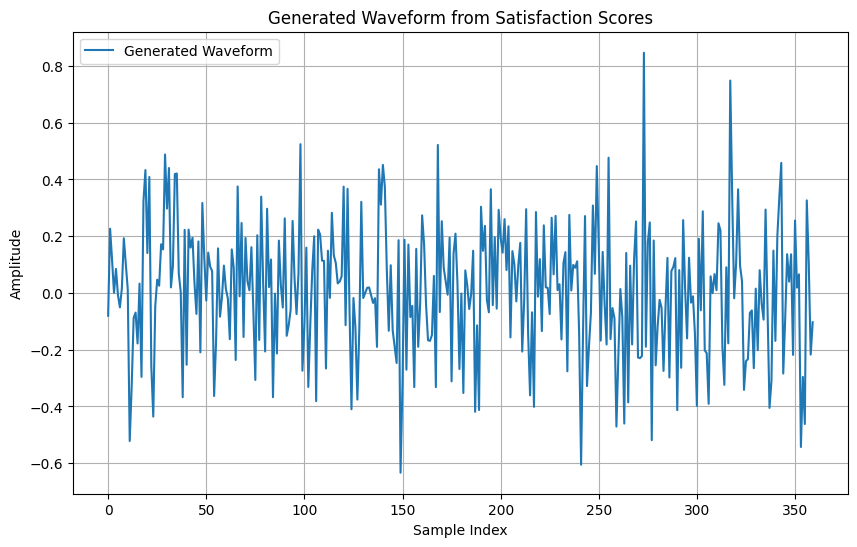

In [9]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

class ImprovedWaveformGenerator(nn.Module):
    def __init__(self, input_size, hidden_size, num_fourier_coeffs):
        super(ImprovedWaveformGenerator, self).__init__()
        self.rnn = nn.GRU(input_size, hidden_size, num_layers=2, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_fourier_coeffs * 2)  # *2 for both real and imaginary parts
        self.num_fourier_coeffs = num_fourier_coeffs

    def forward(self, satisfaction_scores):
        rnn_output, _ = self.rnn(satisfaction_scores.unsqueeze(1))
        fourier_coeffs = self.fc(rnn_output.squeeze(1))
        return fourier_coeffs

def generate_smooth_waveform(model, satisfaction_scores, num_samples=360):
    model.eval()
    with torch.no_grad():
        fourier_coeffs = model(satisfaction_scores)
        
    # 실수부와 허수부 분리
    real_parts = fourier_coeffs[:, :model.num_fourier_coeffs]
    imag_parts = fourier_coeffs[:, model.num_fourier_coeffs:]
    
    # 복소수 푸리에 계수 생성
    complex_coeffs = torch.complex(real_parts, imag_parts)
    
    # 푸리에 역변환
    device = satisfaction_scores.device
    time = torch.linspace(0, 1, num_samples, device=device)
    waveform = torch.zeros(num_samples, device=device)
    for n in range(model.num_fourier_coeffs):
        waveform += torch.real(complex_coeffs[0, n] * torch.exp(1j * 2 * np.pi * n * time))
    
    return waveform.cpu().numpy()

def load_pretrained_weights(model, weights_path, device):
    try:
        state_dict = torch.load(weights_path, map_location=device)
        model_state_dict = model.state_dict()
        
        # 호환되는 가중치만 로드
        compatible_state_dict = {k: v for k, v in state_dict.items() if k in model_state_dict and v.shape == model_state_dict[k].shape}
        model_state_dict.update(compatible_state_dict)
        model.load_state_dict(model_state_dict)
        
        print(f"Loaded pretrained weights from {weights_path}")
        print(f"Loaded {len(compatible_state_dict)} compatible layers out of {len(model_state_dict)} total layers")
    except FileNotFoundError:
        print(f"Weights file {weights_path} not found. Using randomly initialized weights.")
    except Exception as e:
        print(f"Error loading weights: {str(e)}. Using randomly initialized weights.")

if __name__ == "__main__":
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")
    
    # 모델 파라미터 설정
    input_size = 3  # 만족도 점수가 3개
    hidden_size = 128
    num_fourier_coeffs = 50  # 생성할 푸리에 계수의 수

    model = ImprovedWaveformGenerator(input_size, hidden_size, num_fourier_coeffs).to(device)
    
    # 가중치 로드 시도
    load_pretrained_weights(model, 'best_model.pth', device)

    # 만족도 점수
    satisfaction_scores = torch.tensor([[10, 10, 10]], dtype=torch.float32).to(device)

    # 부드러운 파형 생성
    generated_waveform = generate_smooth_waveform(model, satisfaction_scores)

    # 그래프 표시
    plt.figure(figsize=(12, 6))
    plt.plot(generated_waveform, label='Generated Smooth Waveform')
    plt.title('Generated Smooth Waveform from Satisfaction Scores')
    plt.xlabel('Sample Index')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid(True)
    plt.show()